## THE BEHAVIOR OF THE FEAR NETWORK COULD BE AFFECTED BY THE INTENSITY OF THE STIMULUS AND THE INTEGRITY OF THE NETWORK

In [1]:
from netpyne import specs, sim

Create type A, B and C neurons and interneurons with proportion (80:20) between neurons and interneurons and each neuron type with proportion (50:30:20) only to print the spikes and raster

In [2]:
tstop = 1000.0

arq = './KimEtAl2013/LAcells_template.hoc'
arq2 = './KimEtAl2013/interneuron_template.hoc'

# Network parameters
netParams = specs.NetParams() # object of class NetParams to store the network parameters
netParams.sizeX = 100 # x-dimension (horizontal length) size in um
netParams.sizeY = 1000 # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = 100 # z-dimension (horizontal length) size in um
netParams.propVelocity = 100.0 # propagation velocity (um/ms)
#netParams.probLengthConst = 150.0 # length constant for conn probability (um)

In [3]:
## Population parameter

n_neurons = 500 #total number of neurons
netParams.popParams['LAddA_pop'] = {'cellType': 'A', 'numCells': int((n_neurons*0.8)*0.5/2), 
                                    'cellModel': 'HH', 'yRange': [0.5,1]}
netParams.popParams['LAddB_pop'] = {'cellType': 'B', 'numCells': int((n_neurons*0.8)*0.3/2), 
                                    'cellModel': 'HH', 'yRange': [0.5,1]}
netParams.popParams['LAddC_pop'] = {'cellType': 'C', 'numCells': int((n_neurons*0.8)*0.2/2),
                                    'cellModel': 'HH', 'yRange': [0.5,1]}

netParams.popParams['LAdvA_pop'] = {'cellType': 'A', 'numCells': int((n_neurons*0.8)*0.5/2), 
                                    'cellModel': 'HH', 'yRange': [0,0.5]}
netParams.popParams['LAdvB_pop'] = {'cellType': 'B', 'numCells': int((n_neurons*0.8)*0.3/2), 
                                    'cellModel': 'HH', 'yRange': [0,0.5]}
netParams.popParams['LAdvC_pop'] = {'cellType': 'C', 'numCells': int((n_neurons*0.8)*0.2/2), 
                                    'cellModel': 'HH', 'yRange': [0,0.5]}

netParams.popParams['IN_pop'] = {'cellType': 'Interneuron', 'numCells': int(n_neurons*0.2), 
                                 'cellModel': 'HH', 'yRange': [0,1]}

Import amygdala cells A, B, C and interneurons of the model of Kim at al. (2013) and their synaptic mechanisms

In [4]:
### Import A
netParams.importCellParams(label='LAddA_rule', conds={'cellType': 'A', 'cellModel': 'HH'}, 
                           fileName=arq, cellName='Cell_A', importSynMechs=True)
### Import B
netParams.importCellParams(label='LAddB_rule', conds={'cellType': 'B', 'cellModel': 'HH'}, 
                           fileName=arq, cellName='Cell_B', importSynMechs=True)
## Import C
netParams.importCellParams(label='LAddC_rule', conds={'cellType': 'C', 'cellModel': 'HH'}, 
                           fileName=arq, cellName='Cell_C', importSynMechs=True)

### Import A
netParams.importCellParams(label='LAdvA_rule', conds={'cellType': 'A', 'cellModel': 'HH'}, 
                           fileName=arq, cellName='Cell_A', importSynMechs=True)
### Import B
netParams.importCellParams(label='LAdvB_rule', conds={'cellType': 'B', 'cellModel': 'HH'}, 
                           fileName=arq, cellName='Cell_B', importSynMechs=True)
## Import C
netParams.importCellParams(label='LAdvC_rule', conds={'cellType': 'C', 'cellModel': 'HH'}, 
                           fileName=arq, cellName='Cell_C', importSynMechs=True)


## Import interneurons
netParams.importCellParams(label='IN_rule', conds={'cellType': 'Interneuron', 'cellModel': 'HH'}, 
                           fileName=arq2, cellName='InterneuronCell', importSynMechs=True)

{conds: {cellType: 'Interneuron', cellModel: 'HH'}, secs: {soma: {geom: {L: 15.0, nseg: 1, diam: 15.0, Ra: 3375.0, cm: 1.0}, topol: {}, mechs: {kdrinter: {gkdrbar: 0.008}, leakinter: {glbar_inter: 5e-05, el: -70.0}, nainter: {gnabar: 0.035}}, ions: {k: {e: -80.0, i: 54.4, o: 2.5}, na: {e: 45.0, i: 10.0, o: 140.0}}}, dend: {geom: {L: 150.0, nseg: 1, diam: 10.0, Ra: 150.0, cm: 1.0}, topol: {parentSec: 'soma', parentX: 1.0, childX: 0.0}, mechs: {kdrinter: {gkdrbar: 0.003}, leakinter: {glbar_inter: 5e-05, el: -70.0}, nainter: {gnabar: 0.01}}, ions: {ca: {e: 120.0, i: 5e-05, o: 2.0}, k: {e: -80.0, i: 54.4, o: 2.5}, na: {e: 45.0, i: 10.0, o: 140.0}}}}, secLists: {}, globals: {}, _repr_mimebundle_: {}}

In [5]:
## Synaptic mechanism
#netParams.synMechParams['AMPA'] = {'mod': 'Exp2Syn', 'tau1': 1.0, 'tau2': 5.0, 'e': 0} # soma NMDA synapse

Define parameters of stimulation

In [6]:
netParams.stimSourceParams['bkg'] = {'type': 'NetStim', 'rate': 40, 'noise': 0.5}

netParams.stimTargetParams['bkg->LAddA'] = {'source': 'bkg', 'conds': {'pop': 'LAddAA'}, 'weight': 0.5,'delay': 5,
                                        'sec': 'soma'}
netParams.stimTargetParams['bkg->LAddB'] = {'source': 'bkg', 'conds': {'pop': 'LAddAB'},'weight': 0.5,'delay': 5,
                                        'sec': 'soma'}

netParams.stimTargetParams['bkg->LAddC'] = {'source': 'bkg', 'conds': {'pop': 'LAddAC'}, 'weight': 0.5,'delay': 5,
                                        'sec': 'soma'}

                                   
netParams.stimTargetParams['bkg->LAdvA'] = {'source': 'bkg', 'conds': {'pop': 'LAdvA'}, 'weight': 0.5,'delay': 5,
                                        'sec': 'soma'} 
                                     
netParams.stimTargetParams['bkg->LAdvB'] = {'source': 'bkg', 'conds': {'pop': 'LAdvB'},'weight': 0.5,'delay': 5,
                                        'sec': 'soma'}
netParams.stimTargetParams['bkg->LAdvC'] = {'source': 'bkg', 'conds': {'pop': 'LAdvC'}, 'weight': 0.5,'delay': 5,
                                        'sec': 'soma'}

netParams.stimTargetParams['bkg->Interneuron'] = {'source': 'bkg', 'conds': {'pop': 'Interneuron'},
                                                  'weight': 0.5,'delay': 5,'sec': 'soma'}

In [7]:
netParams.connParams['A->B1'] = {'preConds': {'pop': 'LAddA'}, 'postConds': {'pop': 'LAddB'}, 
                    'probability': 0.5,  # max number of incoming conns to cell	'
                    'weight': 0.02,  # synaptic weight
                    'delay': 5, # transmission delay (ms) '
                    'sec': 'soma',
                    'plasticity': {'mech': 'STDP', 'params': {'hebbwt': 0.01, 'antiwt':-0.01, 'wmax': 50,
                                                              'RLon': 1, 'tauhebb': 10}}}

netParams.connParams['A->C1'] = {'preConds': {'cellType': 'LAddA'}, 'postConds': {'cellType': 'LAddC'}, 
                    'probability': 0.5,  # max number of incoming conns to cell	'
                    'weight': 0.02,  # synaptic weight
                    'delay': 5, # transmission delay (ms) '
                    'sec': 'soma',
                    'plasticity': {'mech': 'STDP', 'params': {'hebbwt': 0.01, 'antiwt':-0.01, 'wmax': 50,
                                                              'RLon': 1, 'tauhebb': 10}}}

netParams.connParams['B->A1'] = {'preConds': {'cellType': 'LAddB'}, 'postConds': {'cellType': 'LAddA'}, 
                    'probability': 0.5,  # max number of incoming conns to cell	'
                    'weight': 0.02,  # synaptic weight
                    'delay': 5, # transmission delay (ms) '
                    'sec': 'soma',
                    'plasticity': {'mech': 'STDP', 'params': {'hebbwt': 0.01, 'antiwt':-0.01, 'wmax': 50, 
                                                              'RLon': 1, 'tauhebb': 10}}}

netParams.connParams['A->B2'] = {'preConds': {'cellType': 'LAdvA'}, 'postConds': {'cellType': 'LAdvB'}, 
                    'probability': 0.5,  # max number of incoming conns to cell	'
                    'weight': 0.02,  # synaptic weight
                    'delay': 5, # transmission delay (ms) '
                    'sec': 'soma',
                    'plasticity': {'mech': 'STDP', 'params': {'hebbwt': 0.01, 'antiwt':-0.01, 'wmax': 50,
                                                              'RLon': 1, 'tauhebb': 10}}}

netParams.connParams['A->C2'] = {'preConds': {'cellType': 'LAdvA'}, 'postConds': {'cellType': 'LAdvC'}, 
                    'probability': 0.5,  # max number of incoming conns to cell	'
                    'weight': 0.02,  # synaptic weight
                    'delay': 5, # transmission delay (ms) '
                    'sec': 'soma',
                    'plasticity': {'mech': 'STDP', 'params': {'hebbwt': 0.01, 'antiwt':-0.01, 'wmax': 50,
                                                              'RLon': 1, 'tauhebb': 10}}}

netParams.connParams['B->A2'] = {'preConds': {'cellType': 'LAdvB'}, 'postConds': {'cellType': 'LAdvA'}, 
                    'probability': 0.5,  # max number of incoming conns to cell	'
                    'weight': 0.02,  # synaptic weight
                    'delay': 5, # transmission delay (ms) '
                    'sec': 'soma',
                    'plasticity': {'mech': 'STDP', 'params': {'hebbwt': 0.01, 'antiwt':-0.01, 'wmax': 50, 
                                                              'RLon': 1, 'tauhebb': 10}}}

In [8]:
# Simulation options
simConfig = specs.SimConfig() # object of class SimConfig to store simulation configuration
simConfig.duration = tstop#1*1e3 # Duration of the simulation, in ms
simConfig.dt = 0.025  # Internal integration timestep to use
simConfig.verbose = 0
simConfig.hParams = {'celsius':31}

In [9]:
# Show detailed messages
simConfig.recordTraces = {'V_soma':{'sec':'soma','loc':0.5,'var':'v'}}
# Dict with traces to record
simConfig.recordStep = 0.01
# Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.filename = 'model_output'
# Set file output names
simConfig.saveJson = True

Plot the spikes and the raster plot

In [10]:
# Save params, network and sim output to pickle file
simConfig.analysis['plotRaster'] = {'orderInverse': True, 'saveFig': 'tut_import_raster.png'}
# Plot a raster
simConfig.analysis['plotTraces'] = {'include': [0,10,13,15]}
simConfig.analysis['plot2Dnet'] = True 


Creating network of 7 cell populations on 1 hosts...
  Number of cells on node 0: 500 
  Done; cell creation time = 0.63 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
Adding stims...
  Number of stims on node 0: 0 
  Done; cell stims creation time = 0.00 s.
Recording 4 traces of 1 types on node 0

Running simulation for 1000.0 ms...
  Done; run time = 92.89 s; real-time ratio: 0.01.

Gathering data...
  Done; gather time = 0.36 s.

Analyzing...
  Cells: 500
  Connections: 0 (0.00 per cell)
  Spikes: 0 (0.00 Hz)
  Simulated time: 1.0 s; 1 workers
  Run time: 92.89 s
Saving output as model_output.json  ... 
Finished saving!
  Done; saving time = 1.46 s.
Plotting raster...
No spikes available to plot raster
Plotting recorded cell traces ... cell


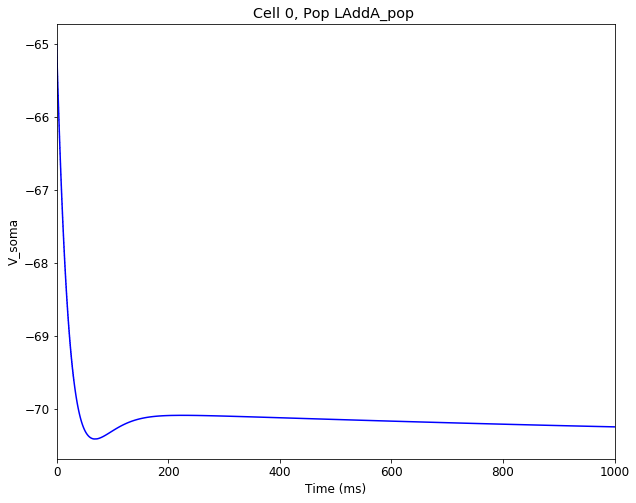

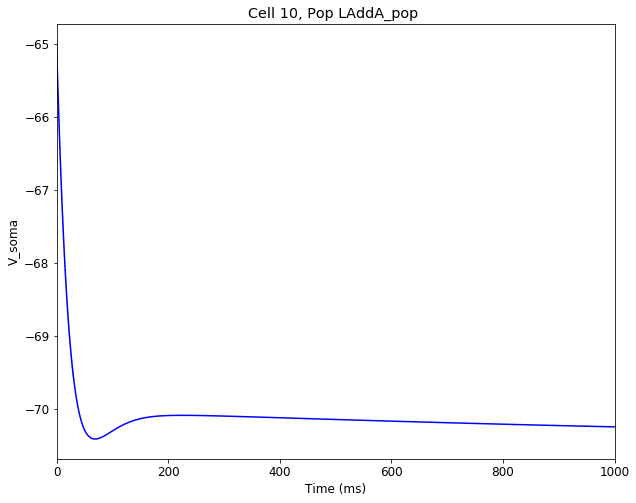

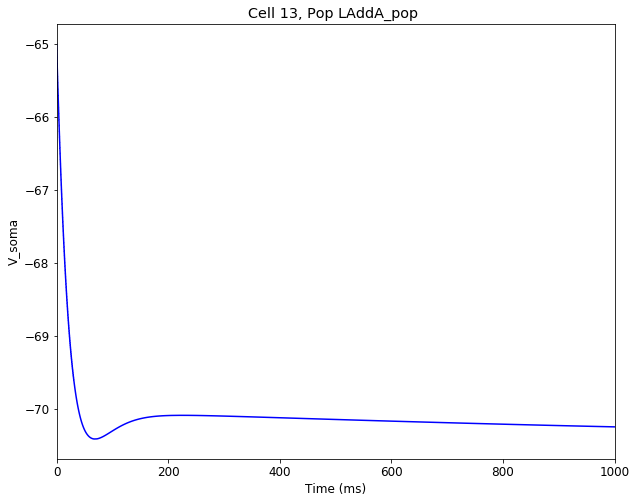

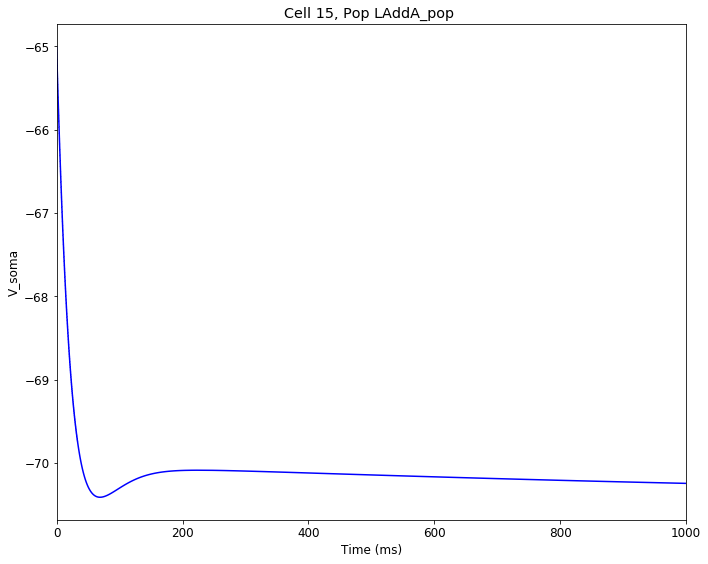

Plotting 2D representation of network cell locations and connections...


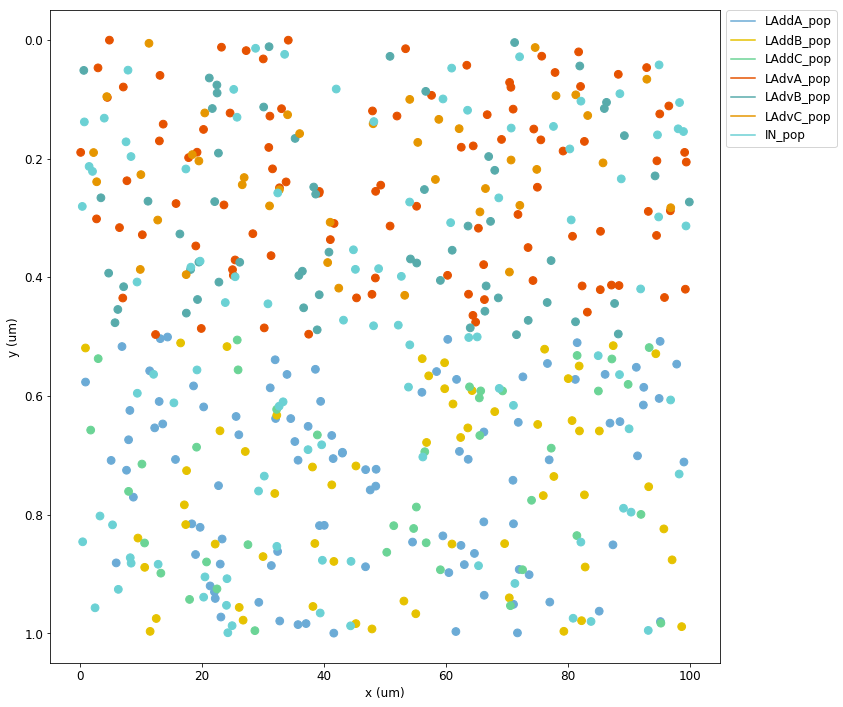

  Done; plotting time = 1.25 s

Total time = 96.61 s


In [11]:
# Plot recorded traces for this list of cells
# Create network and run simulation
sim.createSimulateAnalyze(netParams = netParams, simConfig = simConfig)

In [12]:
sim.analysis.plotRaster(include = ['allCells'], showFig=True)

Plotting raster...
No spikes available to plot raster
